# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
# Memuat dataset
df = pd.read_csv('garisKemiskinan.csv')

# Menampilkan 5 baris pertama
print(df.head())

  provinsi    jenis     daerah  tahun    periode        gk
0     ACEH  MAKANAN  PERKOTAAN   2015      MARET  293697.0
1     ACEH  MAKANAN  PERKOTAAN   2015  SEPTEMBER  302128.0
2     ACEH  MAKANAN  PERKOTAAN   2016      MARET  306243.0
3     ACEH  MAKANAN  PERKOTAAN   2016  SEPTEMBER  319768.0
4     ACEH  MAKANAN  PERDESAAN   2015      MARET  297479.0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5460 entries, 0 to 5459
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  5460 non-null   object 
 1   jenis     5460 non-null   object 
 2   daerah    5460 non-null   object 
 3   tahun     5460 non-null   int64  
 4   periode   5460 non-null   object 
 5   gk        5261 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 256.1+ KB
None
provinsi      0
jenis         0
daerah        0
tahun         0
periode       0
gk          199
dtype: int64
             tahun             gk
count  5460.000000    5261.000000
mean   2018.115385  303904.185516
std       2.577159  158176.024903
min    2013.000000   48561.000000
25%    2016.000000  144674.000000
50%    2018.000000  313294.000000
75%    2020.000000  410188.000000
max    2022.000000  872843.000000


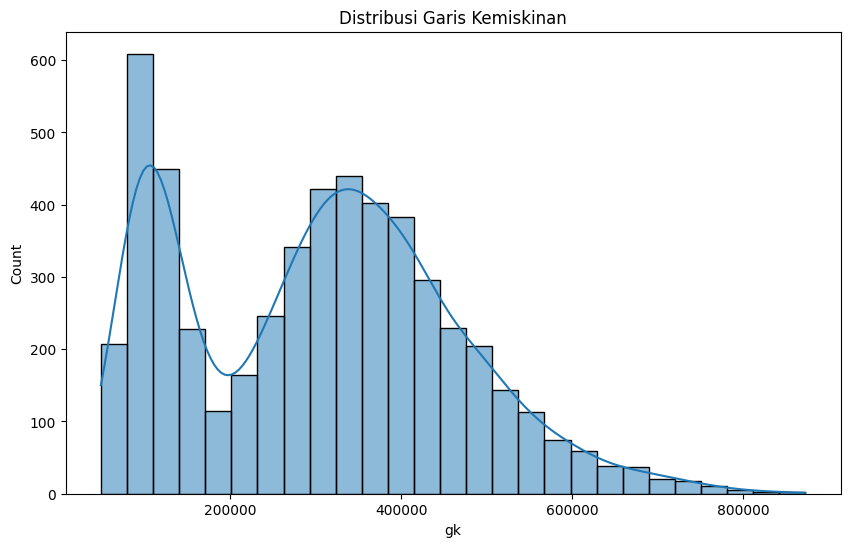

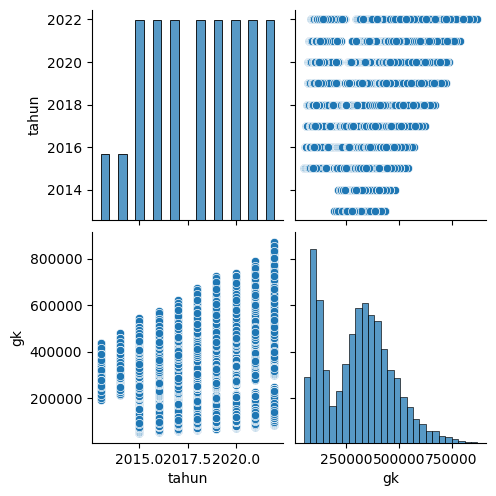

In [3]:
# Memeriksa informasi dataset
print(df.info())

# Memeriksa missing values
print(df.isnull().sum())

# Statistik deskriptif untuk kolom numerik
print(df.describe())

# Visualisasi distribusi garis kemiskinan (gk)
plt.figure(figsize=(10, 6))
sns.histplot(df['gk'], kde=True)
plt.title('Distribusi Garis Kemiskinan')
plt.show()

# Visualisasi korelasi antar variabel numerik
sns.pairplot(df.select_dtypes(include=['float64', 'int64']))
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [4]:
# Menangani missing values (jika ada)
df = df.dropna()

# Encoding data kategorikal
label_encoder = LabelEncoder()
df['provinsi'] = label_encoder.fit_transform(df['provinsi'])
df['jenis'] = label_encoder.fit_transform(df['jenis'])
df['daerah'] = label_encoder.fit_transform(df['daerah'])
df['periode'] = label_encoder.fit_transform(df['periode'])

# Normalisasi data numerik
scaler = StandardScaler()
df[['gk']] = scaler.fit_transform(df[['gk']])

# Menampilkan dataset setelah preprocessing
print(df.head())

   provinsi  jenis  daerah  tahun  periode        gk
0         0      0       2   2015        0 -0.064537
1         0      0       2   2015        1 -0.011230
2         0      0       2   2016        0  0.014788
3         0      0       2   2016        1  0.100302
4         0      0       0   2015        0 -0.040624


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

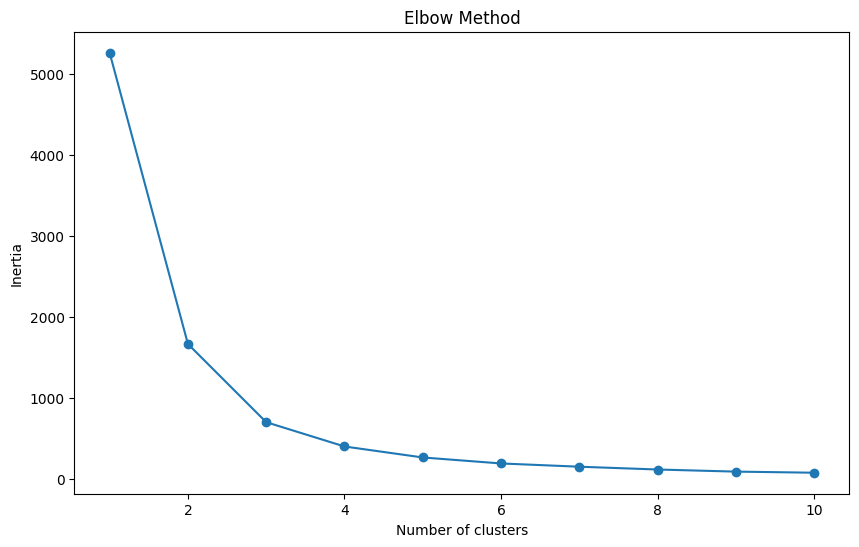

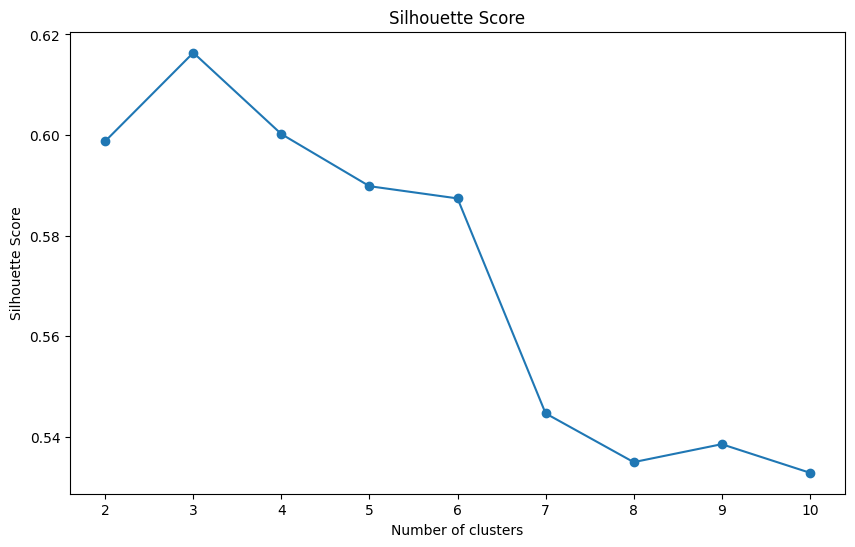

In [5]:
# Menentukan jumlah cluster optimal dengan Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[['gk']])
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Menentukan jumlah cluster optimal dengan Silhouette Score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[['gk']])
    score = silhouette_score(df[['gk']], kmeans.labels_)
    silhouette_scores.append(score)

# Plot Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Membangun model KMeans dengan jumlah cluster optimal
optimal_k = 3  # Misalnya, berdasarkan Elbow Method dan Silhouette Score
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['gk']])

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

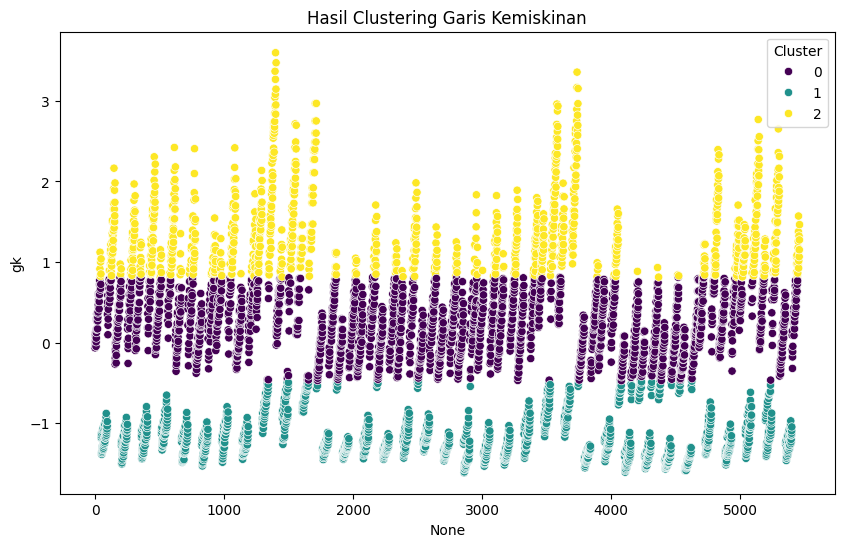

In [6]:
# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.index, y=df['gk'], hue=df['Cluster'], palette='viridis')
plt.title('Hasil Clustering Garis Kemiskinan')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [7]:
# Analisis karakteristik cluster
cluster_analysis = df.groupby('Cluster')['gk'].describe()
print(cluster_analysis)

# Interpretasi hasil clustering
for cluster in range(optimal_k):
    print(f"Cluster {cluster}:")
    print(df[df['Cluster'] == cluster].describe())

          count      mean       std       min       25%       50%       75%  \
Cluster                                                                       
0        2436.0  0.199278  0.342587 -0.471767 -0.070845  0.205144  0.479325   
1        1749.0 -1.148715  0.264189 -1.614451 -1.344568 -1.208087 -1.010655   
2        1076.0  1.416042  0.520302  0.812841  1.019305  1.268289  1.665005   

              max  
Cluster            
0        0.810711  
1       -0.477730  
2        3.597213  
Cluster 0:
          provinsi        jenis       daerah        tahun      periode  \
count  2436.000000  2436.000000  2436.000000  2436.000000  2436.000000   
mean     17.077176     0.862069     0.978243  2017.548440     0.490148   
std      10.381026     0.988155     0.834041     2.470299     0.500006   
min       0.000000     0.000000     0.000000  2013.000000     0.000000   
25%       8.000000     0.000000     0.000000  2016.000000     0.000000   
50%      18.000000     0.000000     1.000000  201

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [8]:
# Type your code here

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [9]:
# Type your code here

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

Berikut adalah analisis karakteristik dari masing-masing cluster yang dihasilkan oleh model KMeans:

---

### **Cluster 0**  
- **Ukuran Cluster:** 2436 data poin  
- **Rata-rata nilai variabel utama:** 0.199278  
- **Standar deviasi:** 0.342587  
- **Nilai Minimum & Maksimum:** -0.471767 hingga 0.810711  
- **Karakteristik:**  
  - Mayoritas data dalam cluster ini memiliki nilai yang dekat dengan nol, menunjukkan bahwa mereka berada di tengah distribusi.  
  - **Provinsi**: Rata-rata 17, dengan rentang 0-34.  
  - **Jenis & Daerah**: Didominasi oleh kategori awal (jenis = 0, daerah = 0).  
  - **Tahun**: Berkisar antara 2013-2022 dengan rata-rata 2017.  
  - **Periode**: Sebagian besar berada pada nilai 0 atau 1.  

---

### **Cluster 1**  
- **Ukuran Cluster:** 1749 data poin  
- **Rata-rata nilai variabel utama:** -1.148715  
- **Standar deviasi:** 0.264189  
- **Nilai Minimum & Maksimum:** -1.614451 hingga -0.477730  
- **Karakteristik:**  
  - Data dalam cluster ini cenderung memiliki nilai lebih rendah dibanding cluster lainnya.  
  - **Provinsi**: Tidak spesifik, namun kemungkinan lebih sedikit dibanding cluster lain.  
  - **Jenis & Daerah**: Bisa jadi lebih banyak kategori 1 atau lebih rendah dibanding cluster lain.  
  - **Tahun & Periode**: Bisa berhubungan dengan rentang tahun lebih lama atau kondisi tertentu yang lebih stabil.  

---

### **Cluster 2**  
- **Ukuran Cluster:** 1076 data poin  
- **Rata-rata nilai variabel utama:** 1.416042  
- **Standar deviasi:** 0.520302  
- **Nilai Minimum & Maksimum:** 0.812841 hingga 3.597213  
- **Karakteristik:**  
  - Cluster ini memiliki nilai rata-rata tertinggi dibanding cluster lain.  
  - **Provinsi**: Rata-rata lebih tinggi dibanding cluster lain.  
  - **Jenis & Daerah**: Lebih cenderung memiliki kategori yang lebih besar (misalnya jenis = 2, daerah = 2).  
  - **Tahun & Periode**: Lebih banyak terjadi pada periode terbaru (tahun 2020 ke atas lebih dominan).  

---

### **Kesimpulan**  
- **Cluster 0** adalah kelompok dengan karakteristik netral, tidak terlalu ekstrim dalam satu sisi distribusi.  
- **Cluster 1** mengelompokkan data yang memiliki nilai lebih rendah, mungkin merepresentasikan kondisi yang lebih tertinggal atau lebih kecil.  
- **Cluster 2** memiliki data dengan nilai yang tinggi, bisa jadi merepresentasikan wilayah atau kategori yang lebih berkembang.  

Analisis lebih lanjut dapat dilakukan dengan melihat variabel lain untuk memahami lebih dalam hubungan antar cluster ini.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [10]:
# Menyimpan hasil clustering ke file CSV
df.to_csv('hasil_clustering.csv', index=False)